In [2]:
import pandas as pd 
import openpyxl
import seaborn as sns
file_path = "notas_ia.xlsx"  
data = pd.read_excel(file_path)
data.head()

,identifier,github_username,Observação,Elevador,Taxi,Nota taxi,Taxi_v2,Total,Regime Disciplinar,DP,Comentário,Unnamed: 11
0,Alex Assumpção Chequer,AlexChequer,NaN,2.0,1,0.875,0.0,2.875,nao,nao,whatsapp,NaN
1,Ana Beatriz da Cunha,aninhaabc,"elevador: fez tudo certo, mas na hora de mostr...",2.5,4,3.500,1.0,7.000,sim,sim,usou chatgpt,NaN
2,Arthur Almeida Abdala,Arthurabdala,faltou,0.0,0,0.000,0.0,0.000,nao,nao,NaN,NaN
3,Artur Álvares Cruz,arturacruz,faltou,0.0,0,0.000,0.0,0.000,nao,nao,NaN,NaN
4,Bruno Urasaki Oberhuber,BRUNOOBERHUBER,faltou,0.0,0,0.000,0.0,0.000,nao,nao,NaN,NaN


In [3]:
data = data.drop(columns=["Unnamed: 11"])
data.head()

,identifier,github_username,Observação,Elevador,Taxi,Nota taxi,Taxi_v2,Total,Regime Disciplinar,DP,Comentário
0,Alex Assumpção Chequer,AlexChequer,NaN,2.0,1,0.875,0.0,2.875,nao,nao,whatsapp
1,Ana Beatriz da Cunha,aninhaabc,"elevador: fez tudo certo, mas na hora de mostr...",2.5,4,3.500,1.0,7.000,sim,sim,usou chatgpt
2,Arthur Almeida Abdala,Arthurabdala,faltou,0.0,0,0.000,0.0,0.000,nao,nao,NaN
3,Artur Álvares Cruz,arturacruz,faltou,0.0,0,0.000,0.0,0.000,nao,nao,NaN
4,Bruno Urasaki Oberhuber,BRUNOOBERHUBER,faltou,0.0,0,0.000,0.0,0.000,nao,nao,NaN


In [6]:
filtro = data[data["Regime Disciplinar"] != "sim"]
filtro = filtro[data['Total'] > 0]
filtro.shape

/tmp/ipykernel_9210/2382000837.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro = filtro[data['Total'] > 0]


(29, 11)

TypeError: distplot() got an unexpected keyword argument 'data'

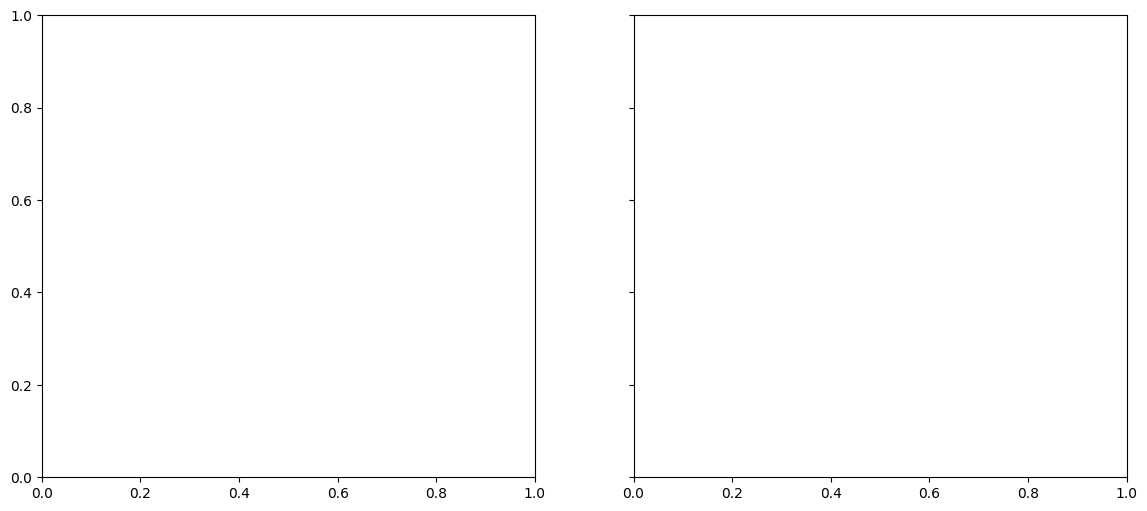

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histogram for 'DP' == 'sim'
sns.distplot(data=filtro[filtro['DP'] == 'sim'], x='Total', ax=axes[0], color='blue')
axes[0].set_title("DP = 'sim'", fontsize=14)
axes[0].set_xlabel('Total', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xlim(0, 10)  # Set x-axis limit to 0-100

# Histogram for 'DP' == 'nao'
sns.distplot(data=filtro[filtro['DP'] == 'nao'], x='Total', ax=axes[1], color='orange')
axes[1].set_title("DP = 'nao'", fontsize=14)
axes[1].set_xlabel('Total', fontsize=12)
axes[1].set_xlim(0, 10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

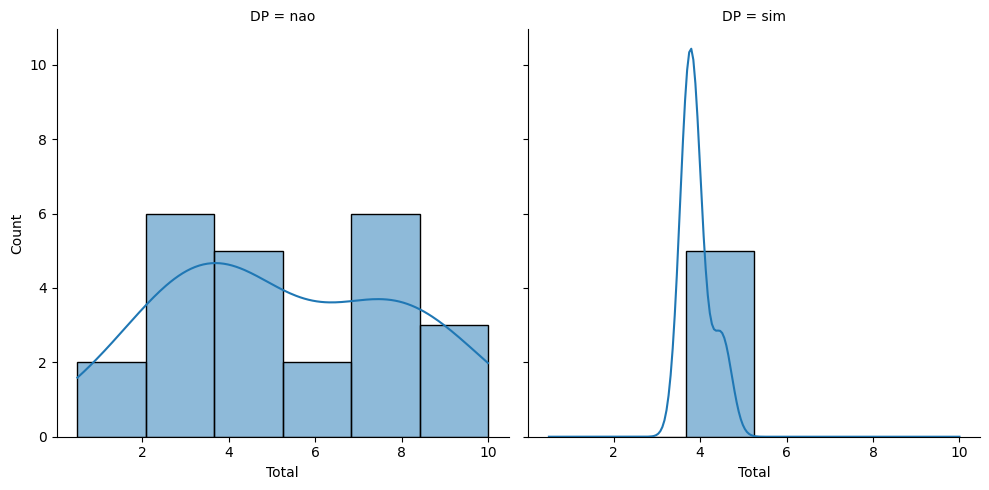

In [15]:
sns.displot(data=filtro, x="Total", col="DP", kde=True)

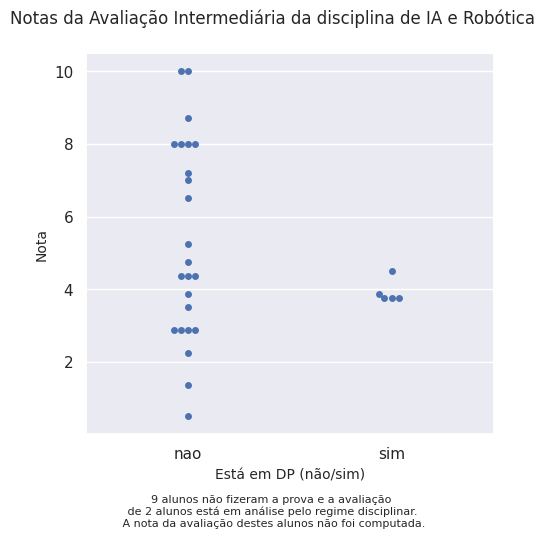

In [23]:
sns.set_theme()

plot = sns.catplot(data=filtro, kind="swarm", x="DP", y="Total")

# Set title and y-axis label
plot.fig.suptitle("Notas da Avaliação Intermediária da disciplina de IA e Robótica", fontsize=12)
plot.set_axis_labels("Está em DP (não/sim)", "Nota", fontsize=10)

# Add caption text
plt.figtext(0.5, -0.05, "9 alunos não fizeram a prova e a avaliação \n de 2 alunos está em análise pelo regime disciplinar. \n A nota da avaliação destes alunos não foi computada.", 
            wrap=True, horizontalalignment='center', fontsize=8)

# Adjust layout to fit title and caption
plot.tight_layout()
plt.show()